In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with
.

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

In [3]:
# Read the data
ames = pd.read_csv("/content/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

In [11]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

r_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha = 1))]
)

degrees = {'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10]}
gscv = GridSearchCV(r_pipeline_1, degrees, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X,y)

ridgeMTS = gscv_fitted.best_estimator_.named_steps['ridge_regression']
ridge_coef = ridgeMTS.coef_


In [10]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_fitted = lr_pipeline_1.fit(X, y)
lr_coeff = lr_pipeline_1.named_steps["linear_regression"].coef_




In [ ]:
coeff_comparison_df = pd.DataFrame({
    'Ridge Coefficients': ridge_coef,
    'Linear Regression Coefficients': lr_coeff
})

coeff_comparison_df


,Ridge Coefficients,Linear Regression Coefficients
0,-5585.147073,-2.241800e+13
1,1279.599730,-2.241800e+13
2,-5465.717759,-2.241800e+13
3,7876.141644,-2.241800e+13
4,3046.095382,-2.241800e+13
...,...,...
249,2913.671195,2.720000e+03
250,1415.145831,2.816000e+03
251,-4409.406398,-5.152000e+03
252,-724.796932,-8.160000e+02


These negative values are showing overfitting


In [12]:
#lasso

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("Lasso", Lasso(alpha = 1))]
)


degrees = {'Lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}

# Grid search with cross-validation
gscv = GridSearchCV(lasso_pipeline_1, degrees, cv=5, scoring='r2')
gscv_fitted = gscv.fit(X, y)


lassoMTS = gscv_fitted.best_estimator_.named_steps['Lasso']
lasso_coef = lassoMTS.coef_








/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e

In [13]:
#elastic net pipeline
#lasso

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

elasticnet_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("Elastic_Net", ElasticNet())]
)


degrees = {'Elastic_Net__alpha': [0.001, 0.01, 0.1, 1, 10], 'Elastic_Net__l1_ratio': [0.25, 0.5, 0.75,1]}

# Grid search with cross-validation
gscv = GridSearchCV(elasticnet_pipeline_1, degrees, cv=5, scoring='r2')
gscv_fitted = gscv.fit(X, y)


elasticMTS = gscv_fitted.best_estimator_.named_steps['Elastic_Net']
elastic_coef = elasticMTS.coef_



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.380e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.170e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.082e+11, tolerance: 1.463e

In [14]:
coeff_comparison_df = pd.DataFrame({
    'Ridge Coefficients': ridge_coef,
    'Linear Regression Coefficients': lr_coeff,
    'Lasso Coefficients': lasso_coef,
    'Elastic Net Coefficients': elastic_coef
})

coeff_comparison_df

,Ridge Coefficients,Linear Regression Coefficients,Lasso Coefficients,Elastic Net Coefficients
0,-4906.494598,-2.241800e+13,-4518.989583,-4367.073164
1,2346.943135,-2.241800e+13,0.000000,2589.302226
2,-1229.177404,-2.241800e+13,-0.000000,-919.417357
3,4620.911891,-2.241800e+13,4592.561335,3853.919064
4,2204.285000,-2.241800e+13,2318.273074,2216.939257
...,...,...,...,...
249,3104.701760,2.720000e+03,2604.184440,3119.443565
250,489.258612,2.816000e+03,2577.708122,410.933060
251,-4135.488058,-5.152000e+03,-4862.648088,-4159.204931
252,-638.220273,-8.160000e+02,-759.350040,-614.755896


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 501 rows containing non-finite values.


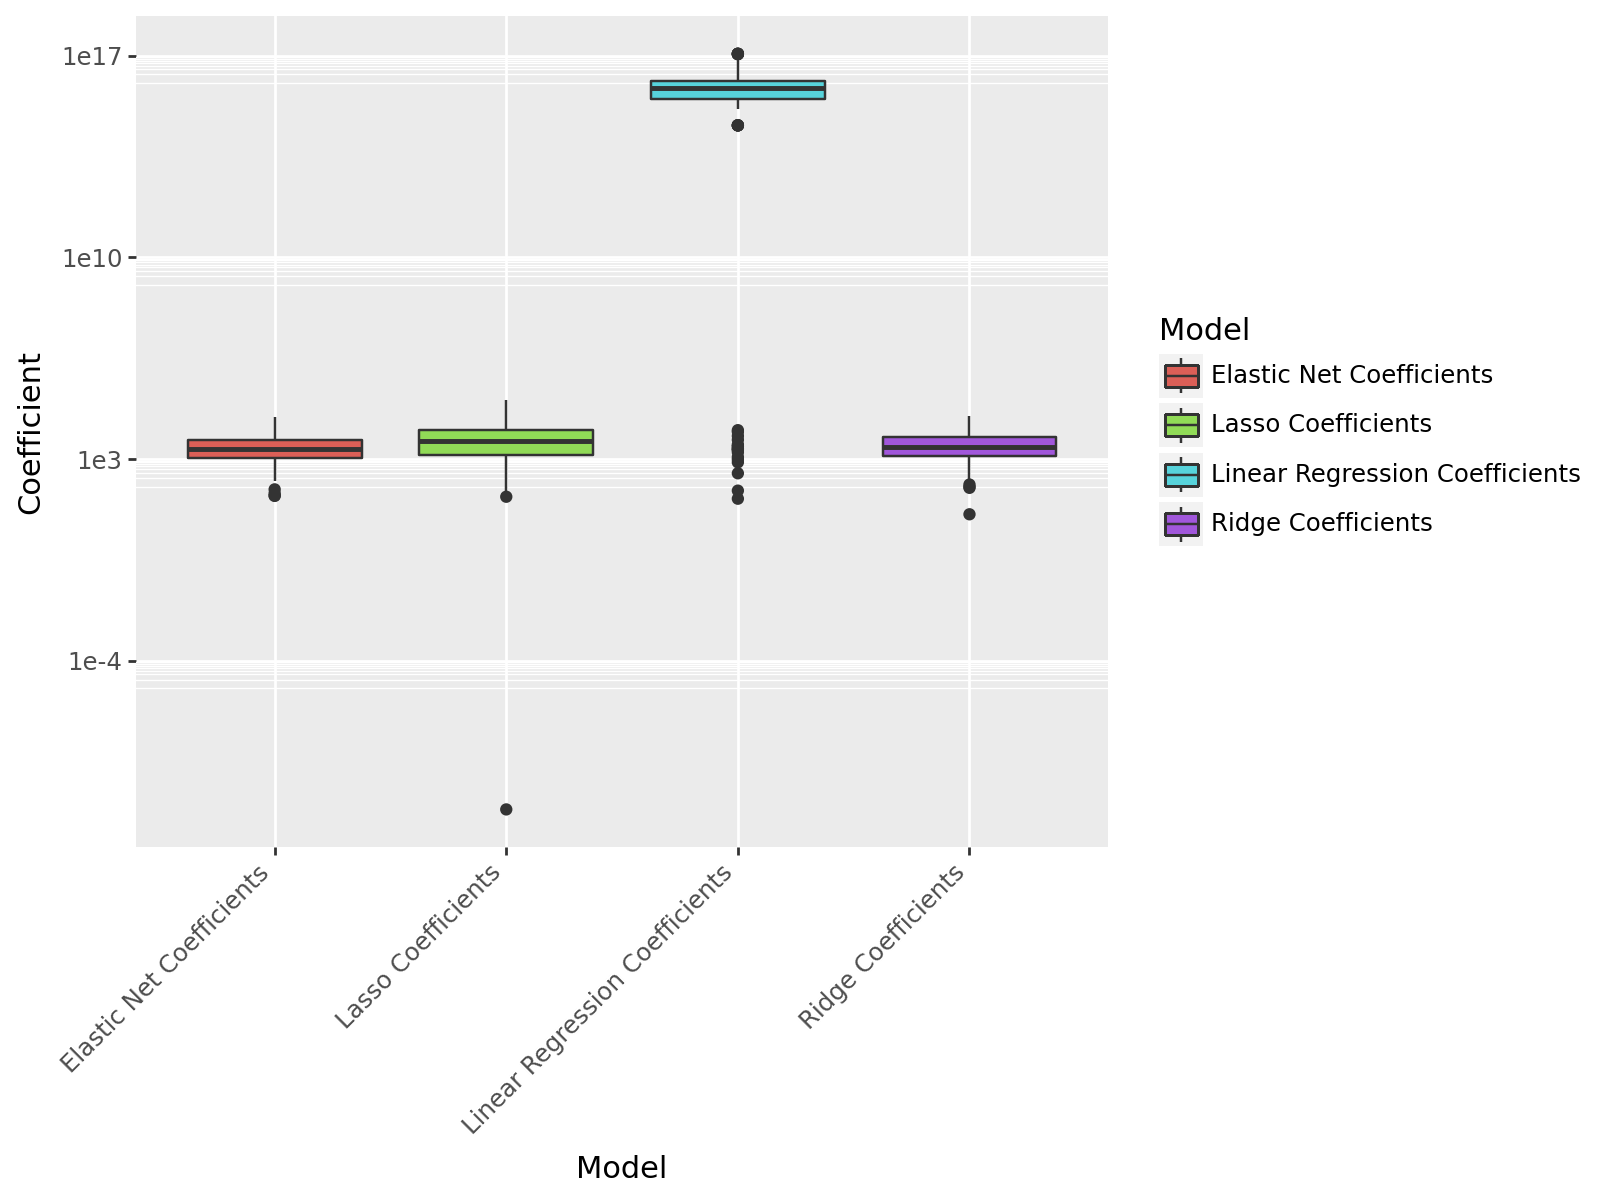

In [19]:
from plotnine import *
melted_df = coeff_comparison_df.melt(var_name='Model', value_name='Coefficient')
melted_df
(ggplot(melted_df, aes(x='Model', y='Coefficient', fill='Model'))
 + geom_boxplot()
 + scale_y_log10()
 + theme(axis_text_x=element_text(angle=45, hjust=1))  # Rotate x-axis labels
 + theme(figure_size=(8, 6)) # Adjust figure size as needed
)